Importar librerias


In [28]:
import numpy as np  # Librería para manejo de arreglos numéricos
import pandas as pd  # Librería para manipulación de datos en estructuras tipo DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error  # Función para calcular el error cuadrático medio (MSE)
from sklearn.linear_model import LinearRegression, ElasticNet  # Modelos de regresión lineal y Elastic Net
from sklearn.neighbors import KNeighborsRegressor  # Modelo de K Vecinos más Cercanos
from sklearn.cross_decomposition import PLSRegression  # Regresión de Mínimos Cuadrados Parciales (PLS)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de Random Forest y Gradient Boosting

Importar datos

In [29]:
df1 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Cordoba1")
df2 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Guajira2")
df3 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Guajira3")
df4 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Guajira4")
df5 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Antioquia5")
df6 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Antioquia6")
df7 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Atlantico7")
df8 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Atlantico8")
df9 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Magdalena9")
df10 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Magdalena10")
df11 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Cesar11")
df12 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Cesar12")
df13 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Bolivar13")
df14 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Bolivar14")
df15 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Choco15")

# Lista Df
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# Unirlos en uno solo
df = pd.concat(dfs, ignore_index=True)

In [30]:
df.head()

,Hoja,Station Number,Año,Día,Irradiacion,Min Temp,Max Temp,Temp Promedio,Vapor,Wind Speed,Precipitacion,Departamento,Irrigacion,Produccion,Toneladas por hectaria
0,2000,1,2000,183.5,4593.10,23.34,32.93,28.14,38.22,1.05,5.83,1,1,5969.732058,59.697321
1,2001,1,2001,183.0,4591.66,23.84,33.27,28.56,39.24,1.09,5.84,1,1,5625.796938,56.257969
2,2002,1,2002,183.0,4591.66,24.13,33.74,28.94,40.13,0.94,5.84,1,1,4309.850302,43.098503
3,2003,1,2003,183.0,4591.66,24.08,33.28,28.68,39.50,1.11,5.84,1,1,4121.129416,41.211294
4,2004,1,2004,183.5,4593.10,24.40,33.39,28.90,40.11,1.05,5.83,1,1,4565.883797,45.658838


Partimos los datos 

In [31]:
features = ['Max Temp', 'Min Temp', 'Vapor', 'Precipitacion', "Departamento", "Irrigacion"]
X = df[features]
y = df['Toneladas por hectaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #No entiendo random state 42

Modelo Regresión Lineal (Sin Interacciones)

In [32]:
# Crear y entrenar el modelo de regresión lineal sin interacciones
modelRL = LinearRegression()
modelRL.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test)

# Evaluación del modelo
mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)

print(f"MSE: {mse_rl}")
print(f"RMSE: {rmse_rl}")

MSE: 107.60401718489452
RMSE: 10.373235617920502


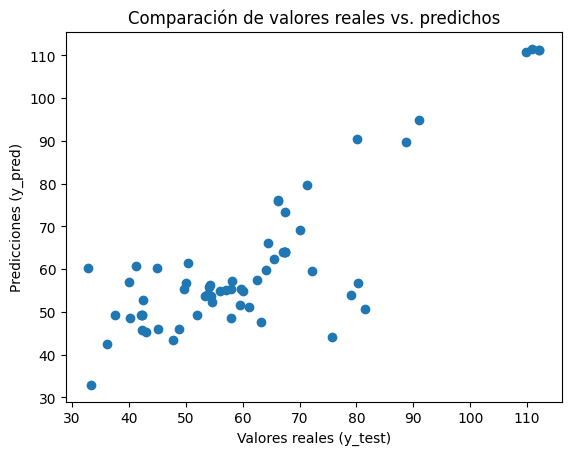

In [33]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Modelo Regresión Lineal (Con Interacciones de Segundo grado)

In [34]:
# Aplicar transformación polinómica de segundo grado (incluye términos de interacción)
poly = PolynomialFeatures(degree=2, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con interacciones
modelRL = LinearRegression()
modelRL.fit(X_train_poly, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test_poly)

# Evaluación del modelo
mse_rl2 = mean_squared_error(y_test, y_pred)
rmse_rl2 = np.sqrt(mse_rl2)

print(f"MSE: {mse_rl2}")
print(f"RMSE: {rmse_rl2}")

MSE: 64.728777871686
RMSE: 8.045419682756519


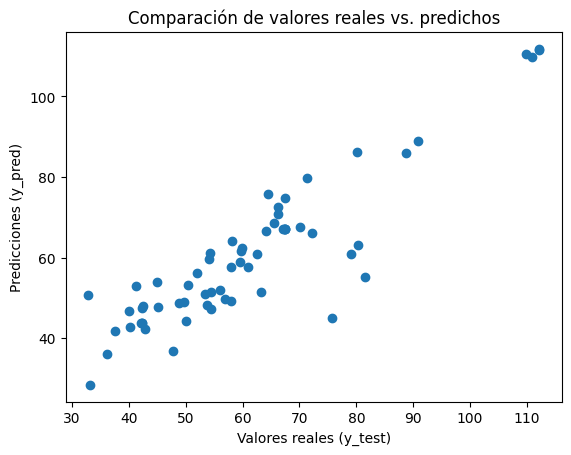

In [35]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Modelo Regresión Lineal (Con Interacciones de Tercer grado)

In [36]:
# Aplicar transformación polinómica de tercer grado
poly = PolynomialFeatures(degree=3, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con interacciones de tercer grado
modelRL = LinearRegression()
modelRL.fit(X_train_poly, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test_poly)

# Evaluación del modelo
mse_rl3 = mean_squared_error(y_test, y_pred)
rmse_rl3 = np.sqrt(mse_rl3)

print(f"MSE: {mse_rl3}")
print(f"RMSE: {rmse_rl3}")

MSE: 130.1322936612624
RMSE: 11.407554236612789


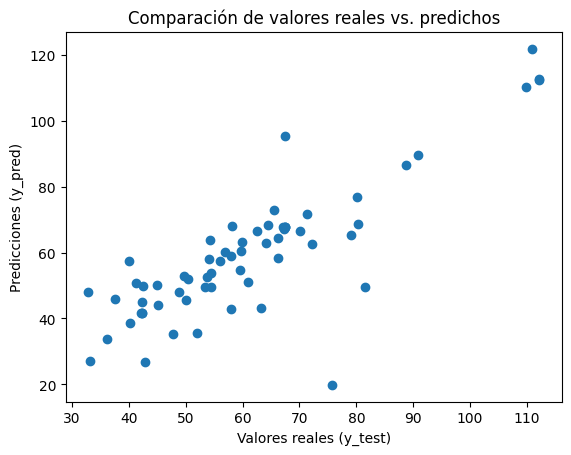

In [37]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Random Forest

In [38]:
# Crear y entrenar el modelo de Random Forest
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árboles
modelRF.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelRF.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)

print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")

MSE: 63.09488336495952
RMSE: 7.94322877455758


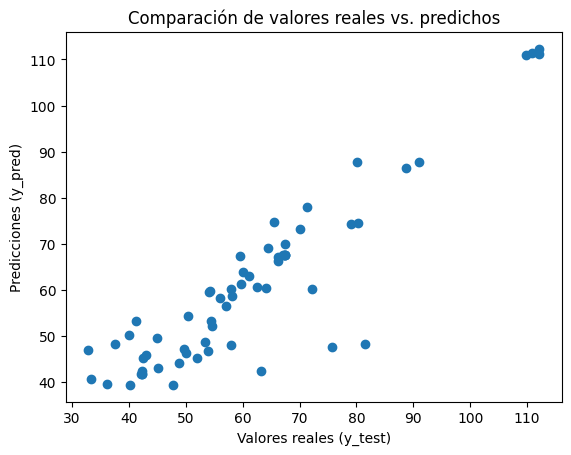

In [39]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Elastic Net

In [40]:
#Encontrar los mejores parametros
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

Mejores parámetros: {'alpha': 0.1, 'l1_ratio': 0.2}


In [41]:
# Crear y entrenar el modelo Elastic Net
modelEN = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)  # α controla la regularización, l1_ratio mezcla L1 y L2
modelEN.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelEN.predict(X_test)

# Evaluación del modelo
mse_en = mean_squared_error(y_test, y_pred)
rmse_en = np.sqrt(mse_en)

print(f"MSE: {mse_en}")
print(f"RMSE: {rmse_en}")

MSE: 105.54652923255463
RMSE: 10.273584050006825


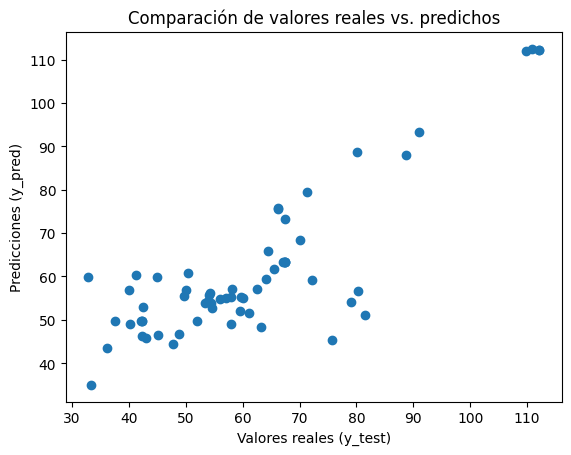

In [42]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

KNN

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 6


In [44]:
# Crear y entrenar el modelo KNN con k=5
modelKNN = KNeighborsRegressor(n_neighbors=best_k)  # k=5 vecinos
modelKNN.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelKNN.predict(X_test)

# Evaluación del modelo
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")

MSE: 50.032082548321604
RMSE: 7.073336026820838


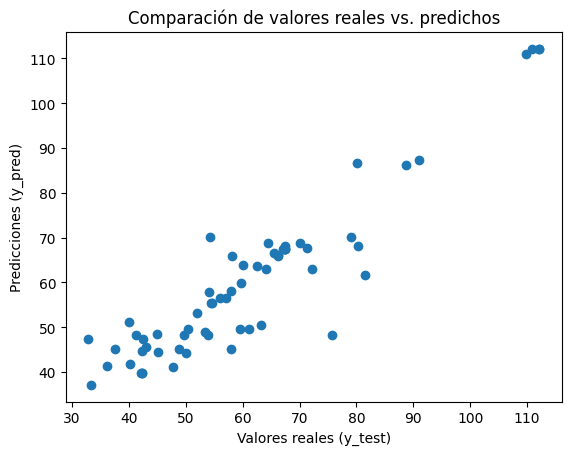

In [45]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

PLS

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_components': range(1, X_train.shape[1] + 1)}
grid_search = GridSearchCV(PLSRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_n = grid_search.best_params_['n_components']
print(f"Mejor número de componentes: {best_n}")

Mejor número de componentes: 5


In [47]:
# Crear y entrenar el modelo PLS con 2 componentes
modelPLS = PLSRegression(n_components=best_n)  # n_components define cuántas combinaciones lineales usar
modelPLS.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelPLS.predict(X_test)

# Evaluación del modelo
mse_pls = mean_squared_error(y_test, y_pred)
rmse_pls = np.sqrt(mse_pls)

print(f"MSE: {mse_pls}")
print(f"RMSE: {rmse_pls}")

MSE: 107.6040171848942
RMSE: 10.373235617920486


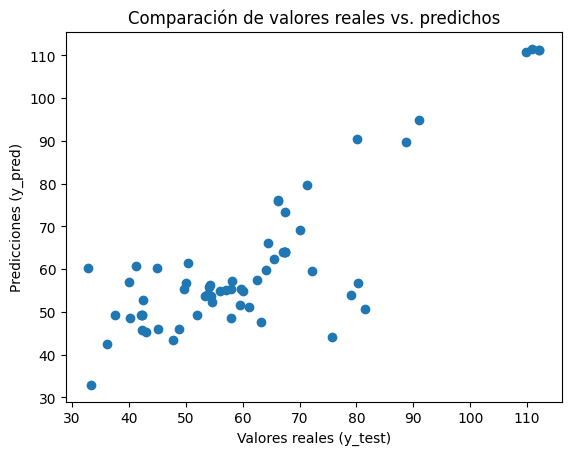

In [48]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Boosted Trees

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']

Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [50]:
# Crear y entrenar el modelo Boosted Trees
modelBoosted = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, random_state=42)
modelBoosted.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelBoosted.predict(X_test)

# Evaluación del modelo
mse_bt = mean_squared_error(y_test, y_pred)
rmse_bt = np.sqrt(mse_bt)

print(f"MSE: {mse_bt}")
print(f"RMSE: {rmse_bt}")

MSE: 65.33900596353213
RMSE: 8.083254664028106


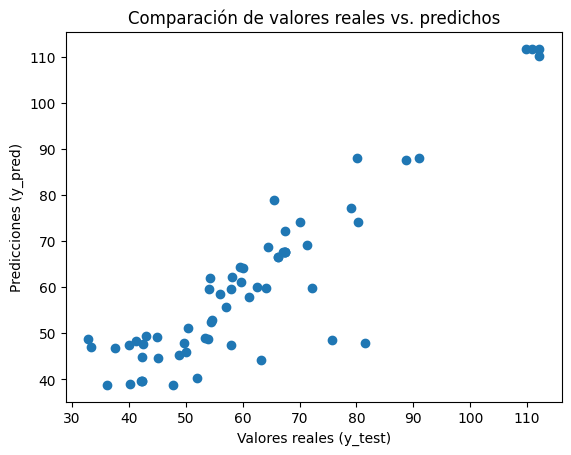

In [51]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Encontrar el Mejor Modelo

In [52]:
# Guardar los resultados de cada modelo
resultados = {
    "Regresión Lineal": {"MSE": mse_rl, "RMSE": rmse_rl},
    "Regresión Lineal (2° grado)": {"MSE": mse_rl2, "RMSE": rmse_rl2},
    "Regresión Lineal (3° grado)": {"MSE": mse_rl3, "RMSE": rmse_rl3},
    "Random Forest": {"MSE": mse_rf, "RMSE": rmse_rf},
    "Elastic Net": {"MSE": mse_en, "RMSE": rmse_en},
    "KNN": {"MSE": mse_knn, "RMSE": rmse_knn},
    "PLS": {"MSE": mse_pls, "RMSE": rmse_pls},
    "Boosted Trees": {"MSE": mse_bt, "RMSE": rmse_bt}
}

# Ordenar por RMSE (menor es mejor)
mejor_modelo = min(resultados, key=lambda x: resultados[x]["RMSE"])

# Mostrar resultados
for modelo, errores in resultados.items():
    print(f"{modelo}: MSE = {errores['MSE']:.4f}, RMSE = {errores['RMSE']:.4f}")

print(f"\nEl mejor modelo es: {mejor_modelo} con RMSE de {resultados[mejor_modelo]['RMSE']:.4f}")

Regresión Lineal: MSE = 107.6040, RMSE = 10.3732
Regresión Lineal (2° grado): MSE = 64.7288, RMSE = 8.0454
Regresión Lineal (3° grado): MSE = 130.1323, RMSE = 11.4076
Random Forest: MSE = 63.0949, RMSE = 7.9432
Elastic Net: MSE = 105.5465, RMSE = 10.2736
KNN: MSE = 50.0321, RMSE = 7.0733
PLS: MSE = 107.6040, RMSE = 10.3732
Boosted Trees: MSE = 65.3390, RMSE = 8.0833

El mejor modelo es: KNN con RMSE de 7.0733


Ya que el mejor modelo es KKN, se prosigue a obtener las varibales significativas

In [53]:
#Permutation Feature Importance 
#Medir cómo empeora el modelo si desordenas una variable. 
#Es independiente del modelo y funciona también con KNN.

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
#Encontrar k
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

# Crear y entrenar el modelo KNN con k=5
modelKNN = KNeighborsRegressor(n_neighbors=best_k)  
modelKNN.fit(X_train, y_train)

# Permutation importance
resultados = permutation_importance(modelKNN, X_test, y_test, n_repeats=30, random_state=42)

# Mostrar resultados
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia Media': resultados.importances_mean,
    'Desviación': resultados.importances_std
}).sort_values(by='Importancia Media', ascending=False)

print(importancia_df)

Mejor valor de k: 6
        Variable  Importancia Media  Desviación
2          Vapor           0.534222    0.122067
3  Precipitacion           0.288513    0.070377
4   Departamento           0.123957    0.044404
1       Min Temp           0.074855    0.031595
5     Irrigacion           0.000000    0.000000
0       Max Temp          -0.001910    0.021488


Heuristica forward

In [4]:
import numpy as np  # Librería para manejo de arreglos numéricos
import pandas as pd  # Librería para manipulación de datos en estructuras tipo DataFrame
import matplotlib.pyplot as plt

df1 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Cordoba1")
df2 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Guajira2")
df3 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Guajira3")
df4 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Guajira4")
df5 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Antioquia5")
df6 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Antioquia6")
df7 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Atlantico7")
df8 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Atlantico8")
df9 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Magdalena9")
df10 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Magdalena10")
df11 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Cesar11")
df12 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Cesar12")
df13 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Bolivar13")
df14 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Bolivar14")
df15 = pd.read_excel("Datos SOLO con irrigacion.xlsx", sheet_name = "Resumen_Choco15")

# Lista Df
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# Unirlos en uno solo
df = pd.concat(dfs, ignore_index=True)

In [5]:
# 1. Variables
categoricas = ['Departamento', 'Irrigacion']  # asegúrate que estén como enteros o strings
numericas = ['Max Temp', 'Min Temp', 'Vapor', 'Precipitacion']
features = numericas + categoricas

# 2. Convertir dummies
X = pd.get_dummies(df[features], drop_first=True)
y = df['Toneladas por hectaria']

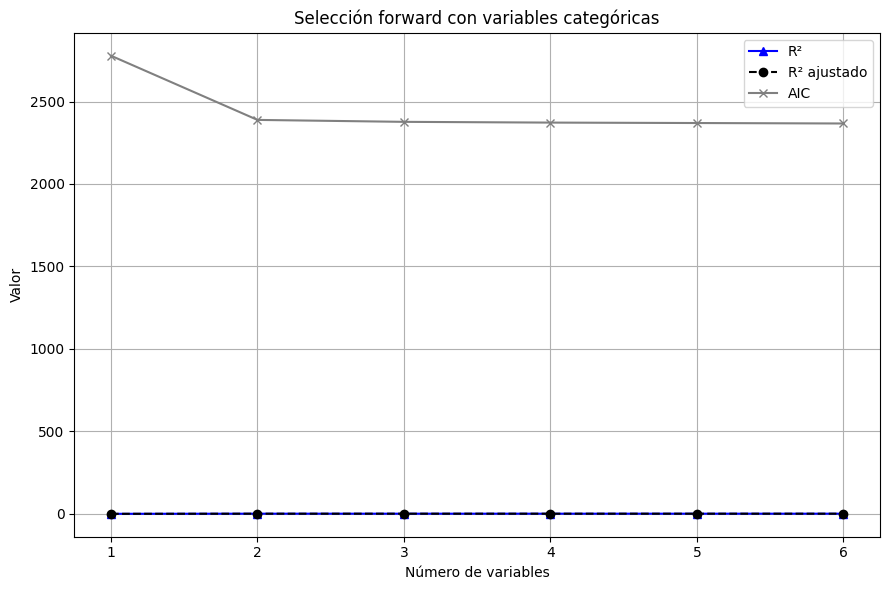

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 3. Inicializar estructuras
remaining = list(X.columns)
selected = []
r2_list = []
adj_r2_list = []
aic_list = []
num_vars = []

# 4. Forward selection
while remaining:
    best_pval = float('inf')
    best_candidate = None
    best_model = None

    for candidate in remaining:
        formula = selected + [candidate]
        X_model = sm.add_constant(X[formula])
        model = sm.OLS(y, X_model).fit()
        pval = model.pvalues[candidate]
        if pval < 0.05 and pval < best_pval:
            best_candidate = candidate
            best_pval = pval
            best_model = model

    if best_candidate:
        selected.append(best_candidate)
        remaining.remove(best_candidate)

        r2_list.append(best_model.rsquared)
        adj_r2_list.append(best_model.rsquared_adj)
        aic_list.append(best_model.aic)
        num_vars.append(len(selected))
    else:
        break

# 5. Graficar
plt.figure(figsize=(9, 6))
plt.plot(num_vars, r2_list, marker='^', label="R²", color='blue')
plt.plot(num_vars, adj_r2_list, marker='o', linestyle='--', label="R² ajustado", color='black')
plt.plot(num_vars, aic_list, marker='x', label="AIC", color='gray')
plt.xlabel("Número de variables")
plt.ylabel("Valor")
plt.title("Selección forward con variables categóricas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Heuristica Backward

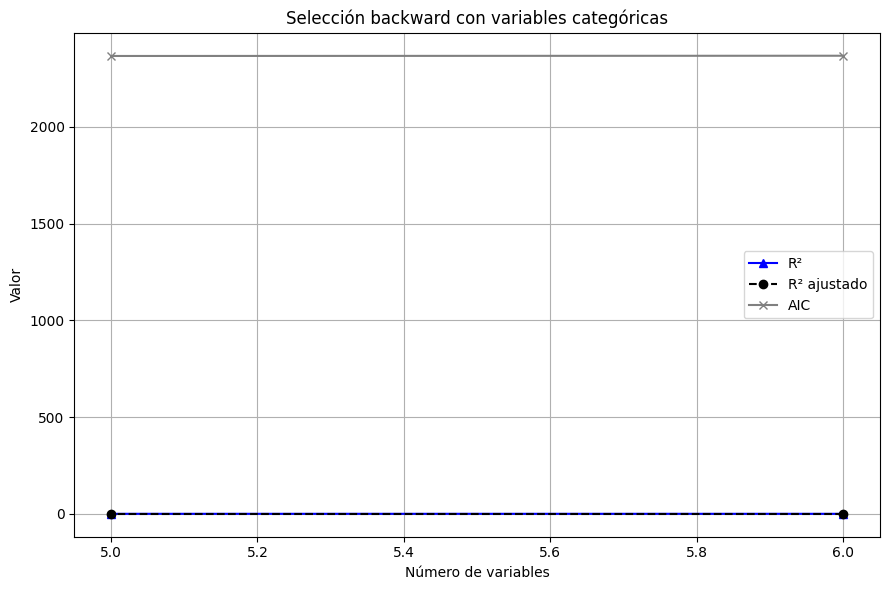

In [9]:

selected = list(X.columns)  # empezamos con todas
r2_list = []
adj_r2_list = []
aic_list = []
num_vars = []

# Backward stepwise
while len(selected) > 0:
    X_model = sm.add_constant(X[selected])
    model = sm.OLS(y, X_model).fit()
    
    # Guardar métricas
    r2_list.append(model.rsquared)
    adj_r2_list.append(model.rsquared_adj)
    aic_list.append(model.aic)
    num_vars.append(len(selected))

    # Revisar p-valores
    pvalues = model.pvalues.drop("const", errors='ignore')
    worst_pval = pvalues.max()
    if worst_pval > 0.05:
        worst_feature = pvalues.idxmax()
        selected.remove(worst_feature)
    else:
        break

# Gráfica
plt.figure(figsize=(9, 6))
plt.plot(num_vars, r2_list, marker='^', label="R²", color='blue')
plt.plot(num_vars, adj_r2_list, marker='o', linestyle='--', label="R² ajustado", color='black')
plt.plot(num_vars, aic_list, marker='x', label="AIC", color='gray')
plt.xlabel("Número de variables")
plt.ylabel("Valor")
plt.title("Selección backward con variables categóricas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Heuristica stepwise

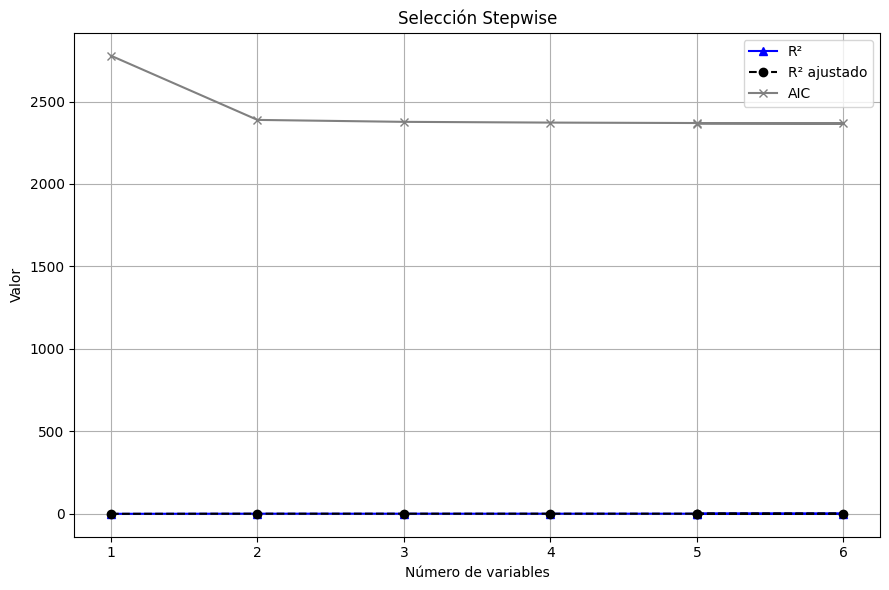

In [10]:
# Inicializar
included = []
remaining = list(X.columns)
r2_list = []
adj_r2_list = []
aic_list = []
num_vars = []

while True:
    changed = False
    
    # Forward step: agregar la mejor nueva variable
    best_pval = 1
    for new_var in remaining:
        trial_vars = included + [new_var]
        model = sm.OLS(y, sm.add_constant(X[trial_vars])).fit()
        pval = model.pvalues[new_var]
        if pval < 0.05 and pval < best_pval:
            best_candidate = new_var
            best_model = model
            best_pval = pval

    if best_pval < 0.05:
        included.append(best_candidate)
        remaining.remove(best_candidate)
        changed = True

        # Guardar métricas
        r2_list.append(best_model.rsquared)
        adj_r2_list.append(best_model.rsquared_adj)
        aic_list.append(best_model.aic)
        num_vars.append(len(included))

    # Backward step: eliminar variable no significativa
    model = sm.OLS(y, sm.add_constant(X[included])).fit()
    pvals = model.pvalues.drop("const", errors="ignore")
    worst_pval = pvals.max()
    if worst_pval > 0.05:
        worst_var = pvals.idxmax()
        included.remove(worst_var)
        changed = True

        # Guardar métricas del modelo sin esa variable
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        r2_list.append(model.rsquared)
        adj_r2_list.append(model.rsquared_adj)
        aic_list.append(model.aic)
        num_vars.append(len(included))

    if not changed:
        break

# Gráfica
plt.figure(figsize=(9, 6))
plt.plot(num_vars, r2_list, marker='^', label="R²", color='blue')
plt.plot(num_vars, adj_r2_list, marker='o', linestyle='--', label="R² ajustado", color='black')
plt.plot(num_vars, aic_list, marker='x', label="AIC", color='gray')
plt.xlabel("Número de variables")
plt.ylabel("Valor")
plt.title("Selección Stepwise")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()